In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def qrw(qubit_num: int) -> QuantumCircuit:
    """
    Returns a QuantumCircuit that implements a quantum random walk with `qubit_num` qubits.
    In this function, the random walk is in a (2^qubit_num) cycle.

    Args:
        qubit_num (int): The number of qubits to use for the random walk. Must be greater than or equal to 2.

    Raises:
        ValueError: If `qubit_num` is less than 2.

    Returns:
        QuantumCircuit: A QuantumCircuit object that implements the quantum random walk with the specified number of qubits.
    """
    if qubit_num < 2:
        raise ValueError("qubit not enough")
    
    walk_space = QuantumRegister(qubit_num, 'node')
    c_reg = ClassicalRegister(qubit_num,'measure')
    coin_qubit = QuantumRegister(1, 'coin')
    
    qrw_qc = QuantumCircuit(walk_space, coin_qubit, c_reg)

    qrw_qc.h(coin_qubit)

    # Increment
    for i in range(qubit_num - 1):
        control_qubits = [coin_qubit[0]] + [walk_space[j] for j in range(i+1, qubit_num)]
        qrw_qc.mcx(control_qubits, walk_space[i])
    qrw_qc.cx(coin_qubit,walk_space[-1])

    # Decrement
    qrw_qc.x(walk_space[1:])
    qrw_qc.x(coin_qubit)
    for i in range(qubit_num - 1):
        control_qubits = [coin_qubit[0]] + [walk_space[j] for j in range(i+1, qubit_num)]
        qrw_qc.mcx(control_qubits, walk_space[i])
    qrw_qc.cx(coin_qubit,walk_space[-1])
    qrw_qc.x(walk_space[1:])
    qrw_qc.x(coin_qubit)

    # Measurement
    n = qubit_num - 1 
    for i in range(qubit_num):
        qrw_qc.measure(walk_space[i], c_reg[n-i])

    return qrw_qc


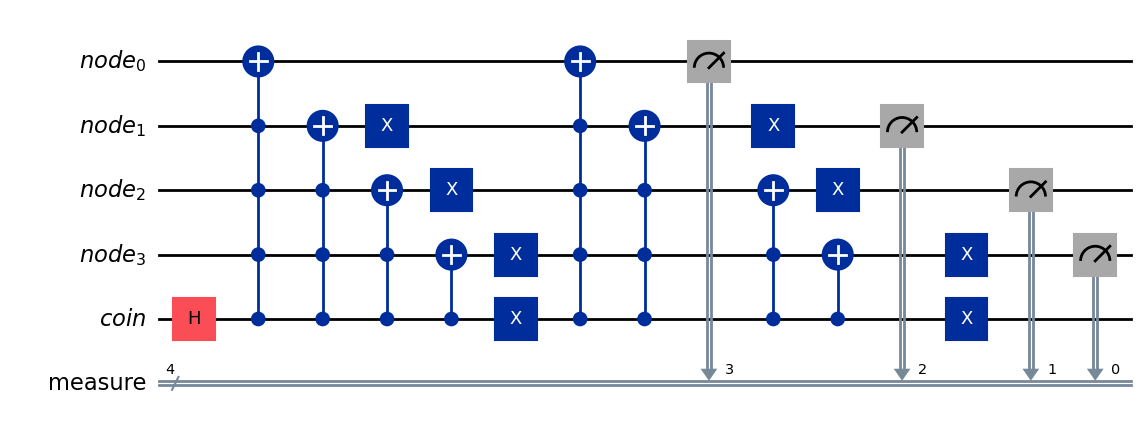

In [2]:

# Test the function
circuit = qrw(4)
circuit.draw(output="mpl")

In [3]:
from qiskit.primitives import Sampler
result = Sampler().run(qrw(5)).result()
result.quasi_dists

[{1: 0.5, 31: 0.499999999999999}]